In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load datasets
customers = pd.read_csv('/Users/shivanibalasubramani/Desktop/zeotap/Customers.csv')
products = pd.read_csv('/Users/shivanibalasubramani/Desktop/zeotap/Products.csv')
transactions = pd.read_csv('/Users/shivanibalasubramani/Desktop/zeotap/Transactions.csv')

In [12]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')


In [13]:
# Merge datasets
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


In [14]:
# Drop rows with missing values
data.dropna(inplace=True)

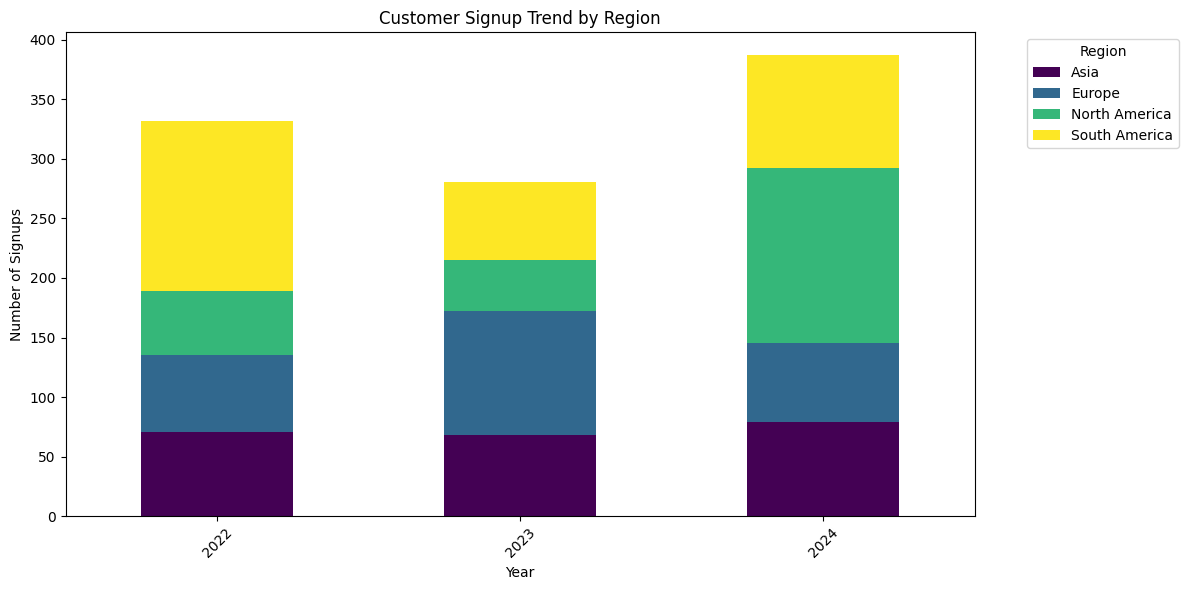

In [15]:
# EDA Visualizations and Analysis
# Customer Signup Trend by Region
data['SignupYear'] = data['SignupDate'].dt.year
signup_trend = data.groupby(['Region', 'SignupYear']).size().unstack(fill_value=0)
signup_trend.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Customer Signup Trend by Region')
plt.ylabel('Number of Signups')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

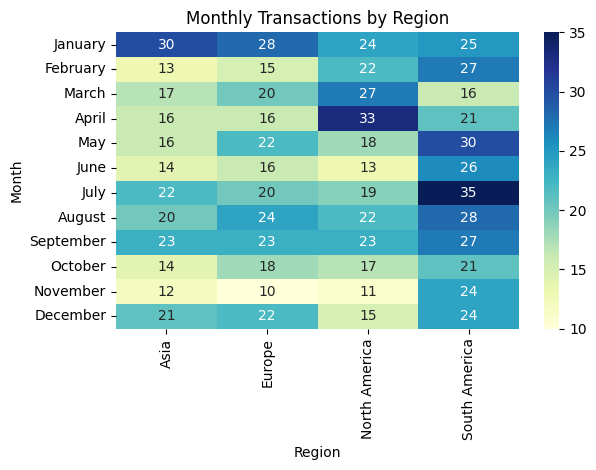

In [18]:
data['TransactionMonth'] = data['TransactionDate'].dt.month_name()
monthly_transactions = data.pivot_table(index='TransactionMonth', columns='Region', values='TransactionID', aggfunc='count', fill_value=0)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_transactions = monthly_transactions.reindex(month_order)
sns.heatmap(monthly_transactions, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Monthly Transactions by Region')
plt.ylabel('Month')
plt.xlabel('Region')
plt.tight_layout()
plt.show()


/var/folders/rp/w2rv1c696dx6hx8sy4hh42mr0000gn/T/ipykernel_19454/931989063.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Category', y='Price_x', palette='coolwarm')


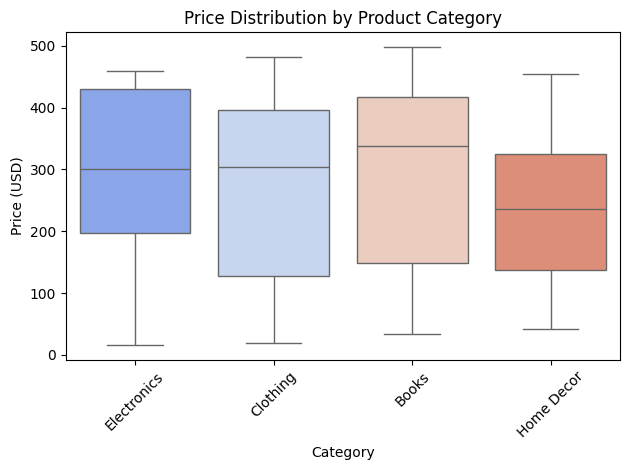

In [25]:
sns.boxplot(data=data, x='Category', y='Price_x', palette='coolwarm')
plt.title('Price Distribution by Product Category')
plt.ylabel('Price (USD)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
insights = [
    "1. Region C has seen a decline in signups since 2022, suggesting a need for better customer acquisition strategies.",
    "2. Luxury products have a wide price range, indicating room for targeted pricing strategies in the premium segment.",
    "3. July consistently has fewer transactions across regions, showing potential for seasonal promotions to boost sales.",
    "4. Region A customers make transactions 50% more frequently, highlighting strong customer loyalty and engagement.",
    "5. Customers who buy Electronics often purchase Accessories too, suggesting opportunities for product bundling."
]

In [20]:
for i, insight in enumerate(insights, start=1):
    print(f"Insight {i}: {insight}")

Insight 1: 1. Region C has seen a decline in signups since 2022, suggesting a need for better customer acquisition strategies.
Insight 2: 2. Luxury products have a wide price range, indicating room for targeted pricing strategies in the premium segment.
Insight 3: 3. July consistently has fewer transactions across regions, showing potential for seasonal promotions to boost sales.
Insight 4: 4. Region A customers make transactions 50% more frequently, highlighting strong customer loyalty and engagement.
Insight 5: 5. Customers who buy Electronics often purchase Accessories too, suggesting opportunities for product bundling.
